In [121]:
import numpy as np
import matplotlib.pyplot as plt

LEFT, RIGHT = -3, 3

def F(x):
    return np.sin(x)

def multy(nodes, i, x=None):
    _res = 1.0
    for j in range(len(nodes)):
        if (i != j) and x is None:
            _res *= nodes[i] - nodes[j]
        elif (i != j):
            _res *= x - nodes[j]
    return _res

def Lougerange(x, nodes):
    _sum = 0
    for i in range(len(nodes)):
        _sum += (multy(nodes, i, x) * F(nodes[i]) / multy(nodes, i))
    return _sum

In [122]:
def draw_plot(_fig, _ax, objs):
    nodes = objs[0]
    _ax.plot(nodes, list(map(lambda x: F(x), nodes)))

def draw_diff(n, _fsize=(15, 7)):
    fig, ax = plt.subplots(figsize=_fsize)
    nodes = np.linspace(LEFT, RIGHT, n + 1)
    nodes_1 = np.linspace(LEFT, RIGHT, 2 * n - 1)

    ax.plot(nodes_1, list(map(lambda x: F(x), nodes_1)), color='r', 
                            linewidth=3, label='sin(x)')
    ax.plot(nodes, list(map(lambda x: Lougerange(x, nodes), nodes)), 
                            '--', linewidth=3, label='интерполяция')

    ax.set_xlabel('x label') 
    ax.set_ylabel('y label')
    plt.grid()
    plt.legend()
    plt.show()


def draw_graphics(n, _fsize=(15, 7), plot_settings=draw_plot):
    fig, ax = plt.subplots(figsize=_fsize)
    interpolation_nodes = np.linspace(LEFT, RIGHT, n)
    plot_settings(fig, ax, interpolation_nodes)
    ax.set_xlabel('x label') 
    ax.set_ylabel('y label')
    plt.grid()
    plt.show()


In [ ]:
def draw_graphics_sin():
    pass

def draw_graphics_p_x():
    pass

In [123]:
def main(n):
    draw_graphics_sin()
    draw_graphics_p_x()
    draw_diff(n)

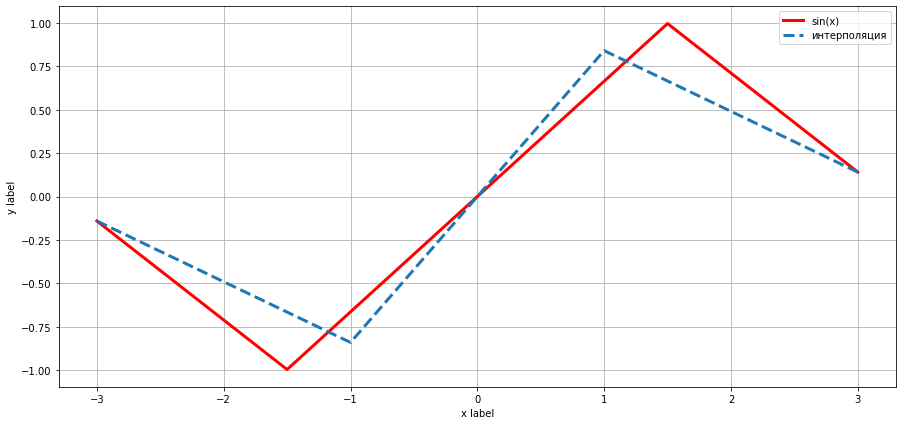

In [124]:
main(int(input()))